In [3]:
import pandas as pd
import re
from matplotlib import pyplot as plt

In [4]:

import pandas as pd
import re 
data = []
omit = r'.*(?=omitted)'

with open("_chat.txt","r") as fp:
    for index, line in enumerate(fp):
        try:
            date_time = re.search(r'(?<=\[)[^]]+(?=\])', line)
            date, time = date_time.group().split(', ')
            sender_message = re.search(r'(?<=\] )[^]]+(?=\:).*', line)
            sender, message = sender_message.group().split(': ', maxsplit=1)
            if re.match(omit, message):
                message = re.search(omit, message).group()[1::]

            r = {
                "Date": date,
                "Time": time,
                "Sender": sender,
                "Message": message,
            }

            data.append(r)

        except:
            pass

df = pd.DataFrame(data)        
df.to_csv("chat.csv", index=False)

In [34]:

import pandas as pd
import re 
data = []
omit = r'.*(?=omitted)'

with open("_chat.txt","r") as fp:
    for index, line in enumerate(fp):
        try:
            date_time = re.search(r'(?<=\[)[^]]+(?=\])', line)
            date, time = date_time.group().split(', ')
            sender_message = re.search(r'(?<=\] )[^]]+(?=\:).*', line)
            sender, message = sender_message.group().split(': ', maxsplit=1)
            if re.match(omit, message):
                message = re.search(omit, message).group()[1::]

            r = {
                "Date": date+" "+time,
                "Sender": sender,
                "Message": message,
            }

            data.append(r)

        except:
            pass

df = pd.DataFrame(data)        
df.to_csv("date_time.csv", index=False)

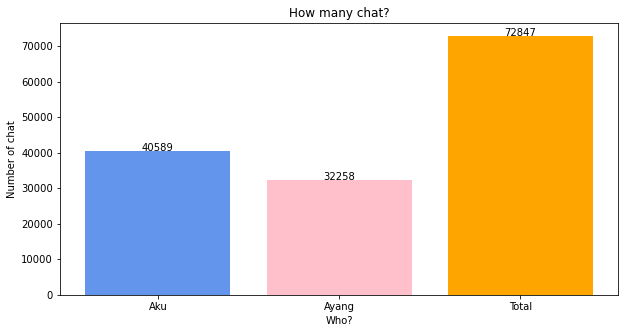

In [6]:
#Count the occurences of the Sender
# print("Total Messages: ", len(df))
messages_count = pd.DataFrame(df["Sender"].value_counts())
# print(messages_count)

#plot
sender = ['Aku', 'Ayang', 'Total']
data = [messages_count.Sender[0], messages_count.Sender[1], len(df)]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')


plt.figure(figsize = (10, 5))
    
# making the bar chart on the data
plt.bar(sender, data, color=['cornflowerblue', 'pink', 'orange'])
    
# calling the function to add value labels
addlabels(sender, data)
    
# giving title to the plot
plt.title("How many chat?")
    
# giving X and Y labels
plt.xlabel("Who?")
plt.ylabel("Number of chat")
    
# visualizing the

plt.show()

In [33]:
df = pd.read_csv('chat.csv')
df

,Date,Time,Sender,Message
0,01/07/20,18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...
1,01/07/20,18:26:19,Irfan Mas’udi,Yang
2,01/07/20,18:26:24,Irfan Mas’udi,Udah sampe rumah
3,01/07/20,18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja
4,01/07/20,18:26:44,Irfan Mas’udi,Dua kali
...,...,...,...,...
72842,16/02/23,13:56:10,Humaira,Pulang malam
72843,16/02/23,13:56:46,Irfan Mas’udi,Oke ayang
72844,16/02/23,13:56:50,Irfan Mas’udi,Take your time
72845,16/02/23,13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%y")

In [9]:
df

,Date,Time,Sender,Message
0,2020-07-01,18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...
1,2020-07-01,18:26:19,Irfan Mas’udi,Yang
2,2020-07-01,18:26:24,Irfan Mas’udi,Udah sampe rumah
3,2020-07-01,18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja
4,2020-07-01,18:26:44,Irfan Mas’udi,Dua kali
...,...,...,...,...
72842,2023-02-16,13:56:10,Humaira,Pulang malam
72843,2023-02-16,13:56:46,Irfan Mas’udi,Oke ayang
72844,2023-02-16,13:56:50,Irfan Mas’udi,Take your time
72845,2023-02-16,13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘


In [10]:
per_mount = df.groupby([pd.Grouper(key = 'Date', freq = 'M')])['Date'].count()
per_mount

Date
2020-07-31    3539
2020-08-31    3600
2020-09-30    4276
2020-10-31    3641
2020-11-30    3805
2020-12-31    2919
2021-01-31    1644
2021-02-28    1538
2021-03-31    3432
2021-04-30    2400
2021-05-31    1901
2021-06-30    1525
2021-07-31    2527
2021-08-31    2475
2021-09-30    2204
2021-10-31    2033
2021-11-30    2257
2021-12-31    2151
2022-01-31    1682
2022-02-28    1231
2022-03-31    1858
2022-04-30    2869
2022-05-31    2114
2022-06-30    1228
2022-07-31    1388
2022-08-31    1267
2022-09-30    1288
2022-10-31    2244
2022-11-30    2597
2022-12-31    3055
2023-01-31    1618
2023-02-28     541
Freq: M, Name: Date, dtype: int64

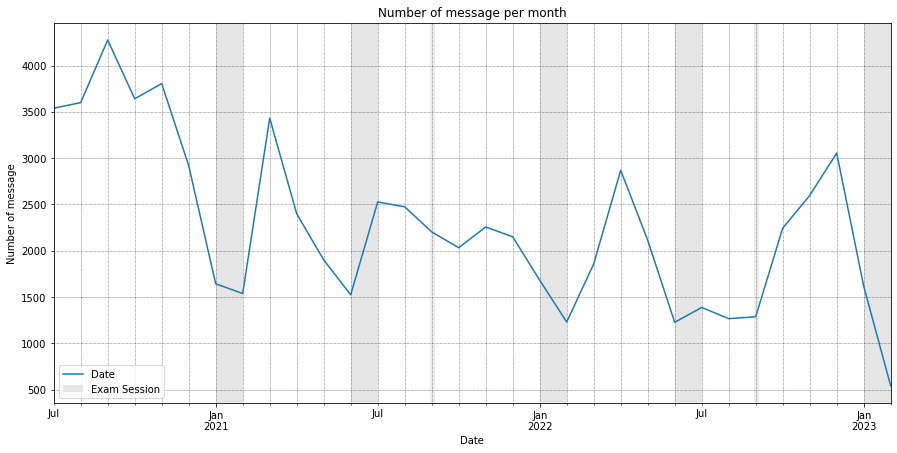

In [11]:
fig, ax = plt.subplots()
per_mount.plot(kind='line', figsize=(15,7), ax=ax)
plt.xlabel("Date")
plt.ylabel("Number of message")
plt.title("Number of message per month")

plt.axvspan('2021-01-07', '2021-02-20', facecolor='0.9', label='Exam Session')
plt.axvspan('2021-06-07', '2021-07-20', facecolor='0.9')
plt.axvline('2021-09-01', color='grey', alpha=0.15, linewidth='5')
plt.axvspan('2022-01-07', '2022-02-20', facecolor='0.9')
plt.axvspan('2022-06-07', '2022-07-20', facecolor='0.9')
plt.axvline('2022-09-01', color='grey', alpha=0.15, linewidth='5')
plt.axvspan('2023-01-07', '2023-02-10', facecolor='0.9')

plt.legend()

# Customize the major grid
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [12]:
# The most number of messsages in a day
g_date = pd.read_csv('chat.csv')
g_date = pd.DataFrame(df.groupby("Date").count()["Message"])

maximum = g_date[g_date["Message"] == max(g_date["Message"])]
print(maximum)

#the list number of messages in a day
minimum = g_date[g_date["Message"] == min(g_date["Message"])]
print(minimum)

            Message
Date               
2020-09-26      523
            Message
Date               
2020-07-28        1
2020-08-07        1
2021-01-12        1
2021-01-23        1
2021-02-11        1
2021-10-19        1
2023-02-14        1


In [13]:
import string

aku = []
ayang = []
for i in range(len(df)):
    if "Humaira" in df.at[i,"Sender"]:
        message = df.at[i,"Message"]
        word_list = message.strip().lower().translate(str.maketrans('', '', string.punctuation)).split(" ")
        for word in word_list:
            ayang.append(word)
    else:
        message = df.at[i,"Message"]
        word_list = message.strip().lower().translate(str.maketrans('', '', string.punctuation)).split(" ")
        for word in word_list:
            aku.append(word)
                
                
#who got the most words:
print("Number of words (Aku):",len(aku))
print("Number of words (Ayang):",len(ayang))

Number of words (Aku): 141646
Number of words (Ayang): 109682


In [14]:
from collections import Counter

#most common words
most_common_me = Counter(aku).most_common()
most_common_her = Counter(ayang).most_common()

print("Unique words used:")
print("Unique words Ayang used: ",len(Counter(ayang).most_common()))
print("Unique words I used: ",len(Counter(aku).most_common()))

Unique words used:
Unique words Ayang used:  12244
Unique words I used:  12999


In [15]:
myself_common = []
common_count_me = []
for index, item in enumerate(most_common_me):
    if index == 20:
        break
    print(item)
    myself_common.append(item[0])
    common_count_me.append(item[1])
    

mylove_common = []
common_count_her = []
for index, item in enumerate(most_common_her):
    if index == 20:
        break
    print(item)
    mylove_common.append(item[0])
    common_count_her.append(item[1])

('yang', 9884)
('ya', 4470)
('\u200eimage', 3546)
('nggak', 2518)
('aku', 1958)
('e', 1921)
('ini', 1738)
('km', 1570)
('😅', 1530)
('yg', 1494)
('wes', 1371)
('apa', 1283)
('kalo', 1236)
('iya', 1197)
('i', 1069)
('tak', 1061)
('ada', 1020)
('gitu', 987)
('oke', 953)
('kan', 939)
('yang', 4492)
('ya', 3348)
('gk', 3019)
('aku', 2203)
('ini', 1610)
('yg', 1540)
('wes', 1391)
('km', 1275)
('\u200eimage', 1250)
('lek', 1099)
('aja', 1052)
('ada', 968)
('mau', 928)
('kok', 917)
('apa', 913)
('kan', 877)
('iya', 842)
('makan', 776)
('bisa', 692)
('itu', 685)


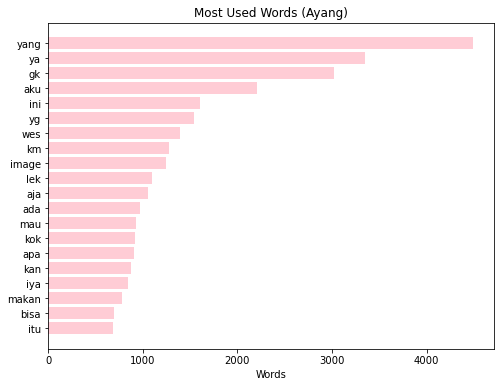

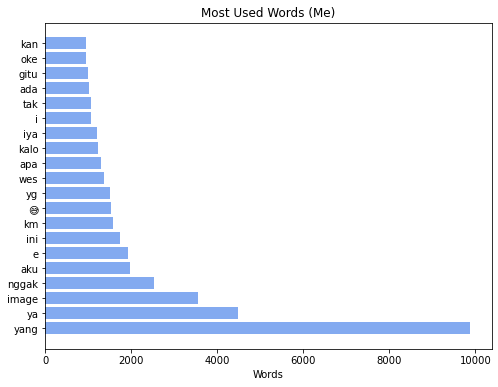

In [16]:
# Her most common words
common_her = pd.DataFrame(common_count_her,mylove_common,columns=["Her"]).sort_values(by="Her")
plt.figure(figsize=(8,6))
plt.barh(common_her.index, common_her["Her"], align='center', alpha=0.8,color="pink")
plt.yticks(mylove_common,mylove_common)
plt.xlabel('Words')
plt.title('Most Used Words (Ayang)')
plt.show()

# Words I commonly used
common_self = pd.DataFrame(common_count_me,myself_common,columns=["Self"])
plt.figure(figsize=(8,6))
plt.barh(common_self.index, common_self["Self"], align='center', alpha=0.8, color="cornflowerblue")
plt.xlabel('Words')
plt.title('Most Used Words (Me)')

plt.show()

In [17]:
import emoji

def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.EMOJI_DATA)
  
mylove_emojis = []
myself_emojis = []
for i in range(len(df)):
    if "Humaira" in df.at[i,"Sender"]:
        message = df.at[i,"Message"]
        emojis = list(extract_emojis(message))
        if not emojis:
            continue
        else:
            for em in emojis:
                mylove_emojis.append(em)
    else:
        message = df.at[i,"Message"]
        emojis = list(extract_emojis(message))
        if not emojis:
            continue
        else:
            for em in emojis:
                myself_emojis.append(em)

In [18]:
print("Most Common emojis used (Me)")
common_emojis_me = Counter(myself_emojis).most_common()
common_emojis_her = Counter(mylove_emojis).most_common()
emojis_me = []
count_me = []
for index, item in enumerate(common_emojis_me):
    if index == 5:
        break
    print(item)
    emojis_me.append(item[0])
    count_me.append(item[1])

print("Most Common emojis used (Her)")
emojis_her = []
count_her = []
for index, item in enumerate(common_emojis_her):
    if index == 5:
        break
    print(item)
    emojis_her.append(item[0])
    count_her.append(item[1])

Most Common emojis used (Me)
('😚', 7765)
('😅', 1669)
('😘', 1173)
('😂', 560)
('😍', 404)
Most Common emojis used (Her)
('😚', 585)
('😅', 514)
('😂', 381)
('😘', 317)
('🤣', 280)


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


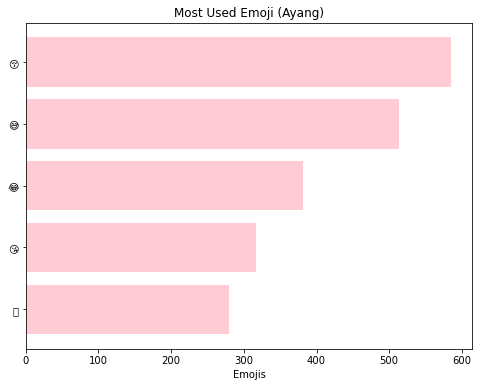

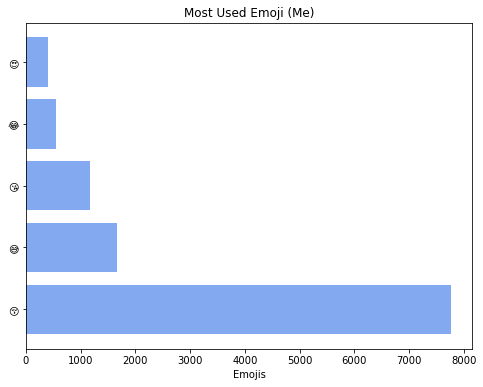

In [19]:
# Her most common words
common_her = pd.DataFrame(count_her, emojis_her,columns=["Her"]).sort_values(by="Her")
plt.figure(figsize=(8,6))
plt.barh(common_her.index, common_her["Her"], align='center', alpha=0.8,color="pink")
# plt.yticks(mylove_common,mylove_common)
plt.xlabel('Emojis')
plt.title('Most Used Emoji (Ayang)')
plt.show()

# Words I commonly used
common_self = pd.DataFrame(count_me,emojis_me,columns=["Self"])
plt.figure(figsize=(8,6))
plt.barh(common_self.index, common_self["Self"], align='center', alpha=0.8, color="cornflowerblue")
plt.xlabel('Emojis')
plt.title('Most Used Emoji (Me)')

plt.show()

In [20]:
df_day = pd.read_csv('chat.csv')

In [21]:
df_day['Date'] = pd.to_datetime(df_day['Date'], format="%d/%m/%y")

In [22]:
df_day

,Date,Time,Sender,Message
0,2020-07-01,18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...
1,2020-07-01,18:26:19,Irfan Mas’udi,Yang
2,2020-07-01,18:26:24,Irfan Mas’udi,Udah sampe rumah
3,2020-07-01,18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja
4,2020-07-01,18:26:44,Irfan Mas’udi,Dua kali
...,...,...,...,...
72842,2023-02-16,13:56:10,Humaira,Pulang malam
72843,2023-02-16,13:56:46,Irfan Mas’udi,Oke ayang
72844,2023-02-16,13:56:50,Irfan Mas’udi,Take your time
72845,2023-02-16,13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘


In [23]:
from datetime import datetime

In [24]:
df_day['Weekday'] = df_day[['Date']].apply(lambda x: datetime.strftime(x['Date'], '%A'), axis=1)

In [25]:

df_day

,Date,Time,Sender,Message,Weekday
0,2020-07-01,18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...,Wednesday
1,2020-07-01,18:26:19,Irfan Mas’udi,Yang,Wednesday
2,2020-07-01,18:26:24,Irfan Mas’udi,Udah sampe rumah,Wednesday
3,2020-07-01,18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja,Wednesday
4,2020-07-01,18:26:44,Irfan Mas’udi,Dua kali,Wednesday
...,...,...,...,...,...
72842,2023-02-16,13:56:10,Humaira,Pulang malam,Thursday
72843,2023-02-16,13:56:46,Irfan Mas’udi,Oke ayang,Thursday
72844,2023-02-16,13:56:50,Irfan Mas’udi,Take your time,Thursday
72845,2023-02-16,13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘,Thursday


In [26]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

messages_count = pd.DataFrame(df_day["Weekday"].value_counts())
print(messages_count)

weekday = list(messages_count.index)
print(weekday)

           Weekday
Sunday       12661
Saturday     10526
Tuesday      10074
Friday       10017
Wednesday     9976
Monday        9801
Thursday      9792
['Sunday', 'Saturday', 'Tuesday', 'Friday', 'Wednesday', 'Monday', 'Thursday']


<AxesSubplot:>

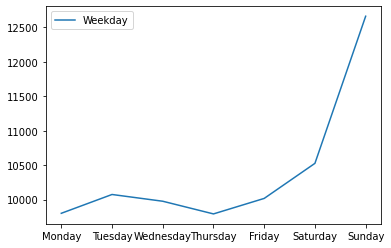

In [27]:
messages_count.reindex(days).plot(kind='line')

In [103]:
date_time = pd.read_csv('date_time.csv')
date_time

,Date,Sender,Message
0,01/07/20 18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...
1,01/07/20 18:26:19,Irfan Mas’udi,Yang
2,01/07/20 18:26:24,Irfan Mas’udi,Udah sampe rumah
3,01/07/20 18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja
4,01/07/20 18:26:44,Irfan Mas’udi,Dua kali
...,...,...,...
72842,16/02/23 13:56:10,Humaira,Pulang malam
72843,16/02/23 13:56:46,Irfan Mas’udi,Oke ayang
72844,16/02/23 13:56:50,Irfan Mas’udi,Take your time
72845,16/02/23 13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘


In [104]:
date_time['Date'] = pd.to_datetime(date_time['Date'], format="%d/%m/%y %H:%M:%S")
date_time

,Date,Sender,Message
0,2020-07-01 18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...
1,2020-07-01 18:26:19,Irfan Mas’udi,Yang
2,2020-07-01 18:26:24,Irfan Mas’udi,Udah sampe rumah
3,2020-07-01 18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja
4,2020-07-01 18:26:44,Irfan Mas’udi,Dua kali
...,...,...,...
72842,2023-02-16 13:56:10,Humaira,Pulang malam
72843,2023-02-16 13:56:46,Irfan Mas’udi,Oke ayang
72844,2023-02-16 13:56:50,Irfan Mas’udi,Take your time
72845,2023-02-16 13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘


In [105]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72847 entries, 0 to 72846
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     72847 non-null  datetime64[ns]
 1   Sender   72847 non-null  object        
 2   Message  72847 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [106]:
date_time['Weekday'] = date_time[['Date']].apply(lambda x: datetime.strftime(x['Date'], '%A'), axis=1)
date_time

,Date,Sender,Message,Weekday
0,2020-07-01 18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...,Wednesday
1,2020-07-01 18:26:19,Irfan Mas’udi,Yang,Wednesday
2,2020-07-01 18:26:24,Irfan Mas’udi,Udah sampe rumah,Wednesday
3,2020-07-01 18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja,Wednesday
4,2020-07-01 18:26:44,Irfan Mas’udi,Dua kali,Wednesday
...,...,...,...,...
72842,2023-02-16 13:56:10,Humaira,Pulang malam,Thursday
72843,2023-02-16 13:56:46,Irfan Mas’udi,Oke ayang,Thursday
72844,2023-02-16 13:56:50,Irfan Mas’udi,Take your time,Thursday
72845,2023-02-16 13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘,Thursday


In [107]:
date_time['Day_of_week'] = date_time['Date'].dt.weekday
date_time

,Date,Sender,Message,Weekday,Day_of_week
0,2020-07-01 18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...,Wednesday,2
1,2020-07-01 18:26:19,Irfan Mas’udi,Yang,Wednesday,2
2,2020-07-01 18:26:24,Irfan Mas’udi,Udah sampe rumah,Wednesday,2
3,2020-07-01 18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja,Wednesday,2
4,2020-07-01 18:26:44,Irfan Mas’udi,Dua kali,Wednesday,2
...,...,...,...,...,...
72842,2023-02-16 13:56:10,Humaira,Pulang malam,Thursday,3
72843,2023-02-16 13:56:46,Irfan Mas’udi,Oke ayang,Thursday,3
72844,2023-02-16 13:56:50,Irfan Mas’udi,Take your time,Thursday,3
72845,2023-02-16 13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘,Thursday,3


In [108]:
date_time.to_csv("weekday.csv", index=False)

In [100]:
new_df = date_time.groupby(["Day_of_week", "Sender", 'Weekday']).size().reset_index(name='Many')

,Day_of_week,Sender,Weekday,Many
0,0,Humaira,Monday,4380
1,0,Irfan Mas’udi,Monday,5421
2,1,Humaira,Tuesday,4542
3,1,Irfan Mas’udi,Tuesday,5532
4,2,Humaira,Wednesday,4393
5,2,Irfan Mas’udi,Wednesday,5583
6,3,Humaira,Thursday,4260
7,3,Irfan Mas’udi,Thursday,5532
8,4,Humaira,Friday,4389
9,4,Irfan Mas’udi,Friday,5628


In [45]:
import seaborn as sns

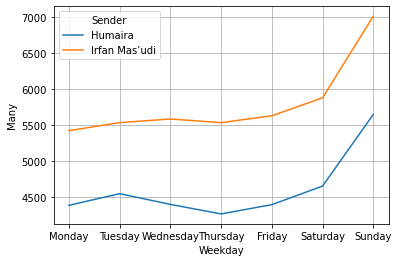

In [102]:
sns.lineplot(x='Weekday', y='Many', hue='Sender', data=new_df)
plt.grid()

In [160]:
heatmap = pd.read_csv('weekday.csv')
heatmap.head()

,Date,Sender,Message,Weekday,Day_of_week
0,2020-07-01 18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...,Wednesday,2
1,2020-07-01 18:26:19,Irfan Mas’udi,Yang,Wednesday,2
2,2020-07-01 18:26:24,Irfan Mas’udi,Udah sampe rumah,Wednesday,2
3,2020-07-01 18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja,Wednesday,2
4,2020-07-01 18:26:44,Irfan Mas’udi,Dua kali,Wednesday,2


In [161]:
heatmap['Date'] = pd.to_datetime(heatmap['Date'], format="%Y/%m/%d %H:%M:%S")
heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72847 entries, 0 to 72846
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         72847 non-null  datetime64[ns]
 1   Sender       72847 non-null  object        
 2   Message      72847 non-null  object        
 3   Weekday      72847 non-null  object        
 4   Day_of_week  72847 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.8+ MB


In [162]:
heatmap['Hour'] = heatmap['Date'].dt.hour
heatmap

,Date,Sender,Message,Weekday,Day_of_week,Hour
0,2020-07-01 18:26:19,Humaira,‎Messages and calls are end-to-end encrypted. ...,Wednesday,2,18
1,2020-07-01 18:26:19,Irfan Mas’udi,Yang,Wednesday,2,18
2,2020-07-01 18:26:24,Irfan Mas’udi,Udah sampe rumah,Wednesday,2,18
3,2020-07-01 18:26:39,Irfan Mas’udi,Ya Allah yang td pas balik hampir aja,Wednesday,2,18
4,2020-07-01 18:26:44,Irfan Mas’udi,Dua kali,Wednesday,2,18
...,...,...,...,...,...,...
72842,2023-02-16 13:56:10,Humaira,Pulang malam,Thursday,3,13
72843,2023-02-16 13:56:46,Irfan Mas’udi,Oke ayang,Thursday,3,13
72844,2023-02-16 13:56:50,Irfan Mas’udi,Take your time,Thursday,3,13
72845,2023-02-16 13:57:03,Irfan Mas’udi,😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘,Thursday,3,13


In [163]:
heatmap = heatmap.groupby(["Day_of_week", "Hour", 'Weekday']).size().reset_index(name='Many')
heatmap

,Day_of_week,Hour,Weekday,Many
0,0,0,Monday,371
1,0,1,Monday,76
2,0,2,Monday,76
3,0,3,Monday,118
4,0,4,Monday,178
...,...,...,...,...
163,6,19,Sunday,41
164,6,20,Sunday,23
165,6,21,Sunday,17
166,6,22,Sunday,27


In [149]:
new_heatmap = heatmap.loc[:, ["Hour", "Weekday", "Many"]]

In [151]:
new_heatmap

,Hour,Weekday,Many
0,0,Monday,1
1,1,Monday,1
2,2,Monday,1
3,3,Monday,1
4,4,Monday,1
...,...,...,...
163,19,Sunday,1
164,20,Sunday,1
165,21,Sunday,1
166,22,Sunday,1


In [164]:
test = heatmap.pivot("Hour", "Weekday", "Many")

<AxesSubplot:xlabel='Weekday', ylabel='Hour'>

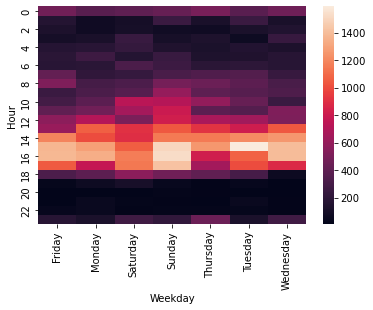

In [165]:
sns.heatmap(test)